# **Analiza sezone NBA 2024/25**

Za projektno nalogo sem pridobil in obdelal podatke iz spletne strani [Basketball Reference](https://www.basketball-reference.com/).  
Zajemal sem **statistiko igralcev v sezoni 2024/25**, in sicer posebej za **redni del sezone** ter za **končnico**.  

Podatke sem iz surove HTML tabele najprej sprogramirano očistil in jih nato shranil v datoteke CSV ter JSON.  
V tem Jupyter Notebooku bom s pomočjo knjižnic **pandas** in **matplotlib** izvedel dodatne analize ter vizualizacije.  

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
koncnica = pd.read_csv('./igralci_koncica.csv', sep=';', decimal='.')
redna = pd.read_csv('./igralci_redna_sezona.csv', sep=';', decimal='.')

## 1. Struktura podatkov

In [39]:
koncnica.head()

,ime,ekipa,pozicija,tekme,točke,podaje,skoki
0,Giannis Antetokounmpo,MIL,PF,5.0,33.0,6.6,15.4
1,Luka Dončić,LAL,PG,5.0,30.2,5.8,7.0
2,Shai Gilgeous-Alexander,OKC,PG,23.0,29.9,6.5,5.3
3,Donovan Mitchell,CLE,SG,9.0,29.6,3.9,4.7
4,Paolo Banchero,ORL,PF,5.0,29.4,4.2,8.4


In [40]:
redna.head()

,ime,ekipa,pozicija,tekme,točke,podaje,skoki
0,Shai Gilgeous-Alexander,OKC,PG,76.0,32.7,6.4,5.0
1,Giannis Antetokounmpo,MIL,PF,67.0,30.4,6.5,11.9
2,Nikola Jokić,DEN,C,70.0,29.6,10.2,12.7
3,Luka Dončić,DAL,PG,22.0,28.1,7.8,8.3
4,Luka Dončić,LAL,PG,28.0,28.2,7.5,8.1


## 2. Čiščenje podatkov

S to kodo sem očistil podatke, da so bili lažji za obdelavo.

In [ ]:
for df in [redna, koncnica]:
    for stolpec in ["točke", "podaje", "skoki"]:
        # Odstrani apostrofe
        df[stolpec] = df[stolpec].astype(str).str.replace("'", "")
        # Pretvori v številke (neveljavne vrednosti postanejo NaN)
        df[stolpec] = pd.to_numeric(df[stolpec], errors='coerce')
    # Odstrani vrstice z NaN v teh stolpcih
    df.dropna(subset=["točke", "podaje", "skoki"], inplace=True)


## 3. Grafična predstavitev podatkov

### 3.1. Redna sezona

3.1.1. Top 10 igralcev, ki so v redni sezoni dosegli v povprečju največ točk na tekmo:

In [29]:
top10_redna = redna.sort_values("točke", ascending=False).head(10)
print("Top 10 igralcev po točkah (Redna sezona):")
print(top10_redna[["ime", "ekipa", "točke"]])


Top 10 igralcev po točkah (Redna sezona):
                       ime ekipa  točke
0  Shai Gilgeous-Alexander   OKC   32.7
1    Giannis Antetokounmpo   MIL   30.4
2             Nikola Jokić   DEN   29.6
4              Luka Dončić   LAL   28.2
3              Luka Dončić   DAL   28.1
5          Anthony Edwards   MIN   27.6
6             Jayson Tatum   BOS   26.8
7             Kevin Durant   PHO   26.6
8             Tyrese Maxey   PHI   26.3
9          Cade Cunningham   DET   26.1


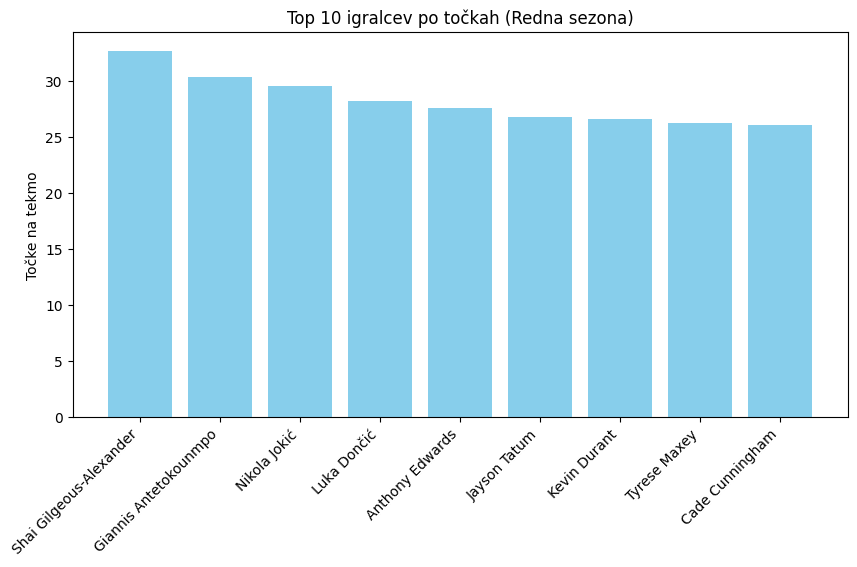

In [30]:
plt.figure(figsize=(10,5))
plt.bar(top10_redna["ime"], top10_redna["točke"], color="skyblue")
plt.title("Top 10 igralcev po točkah (Redna sezona)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Točke na tekmo")
plt.show()

3.1.2. Top 10 igralcev redne sezone po skokih:

In [41]:
top10_redna_skoki = redna.sort_values("skoki", ascending=False).head(10)
print("Top 10 igralcev po skokih (Redna sezona):")
print(top10_redna_skoki[["ime", "ekipa", "skoki"]])


Top 10 igralcev po skokih (Redna sezona):
                       ime ekipa  skoki
58        Domantas Sabonis   SAC   13.9
21      Karl-Anthony Towns   NYK   12.8
2             Nikola Jokić   DEN   12.7
87             Ivica Zubac   LAC   12.6
172         Walker Kessler   UTA   12.2
15           Anthony Davis   LAL   11.9
1    Giannis Antetokounmpo   MIL   11.9
22       Victor Wembanyama   SAS   11.0
158            Rudy Gobert   MIN   10.9
169     Isaiah Hartenstein   OKC   10.7


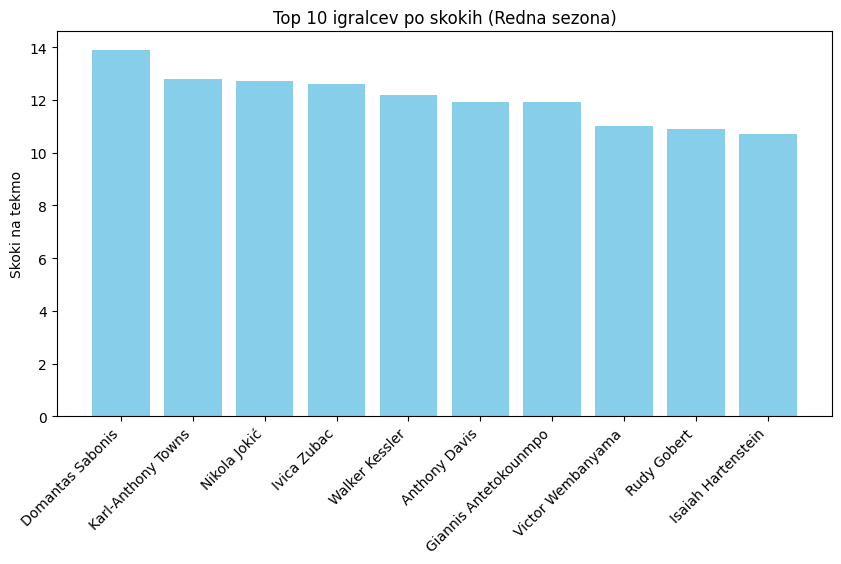

In [42]:

plt.figure(figsize=(10,5))
plt.bar(top10_redna_skoki["ime"], top10_redna_skoki["skoki"], color="skyblue")
plt.title("Top 10 igralcev po skokih (Redna sezona)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Skoki na tekmo")
plt.show()

3.1.3. Top 10 po podajah:

In [43]:
top10_redna_podaje = redna.sort_values("podaje", ascending=False).head(10)
print("Top 10 igralcev po podajah (Redna sezona):")
print(top10_redna_podaje[["ime", "ekipa", "podaje"]])

Top 10 igralcev po podajah (Redna sezona):
                   ime ekipa  podaje
24          Trae Young   ATL    11.6
2         Nikola Jokić   DEN    10.2
65   Tyrese Haliburton   IND     9.2
9      Cade Cunningham   DET     9.1
34        James Harden   LAC     8.7
20        LeBron James   LAL     8.2
520      Elfrid Payton   NOP     8.1
3          Luka Dončić   DAL     7.8
4          Luka Dončić   LAL     7.5
79     Dejounte Murray   NOP     7.4


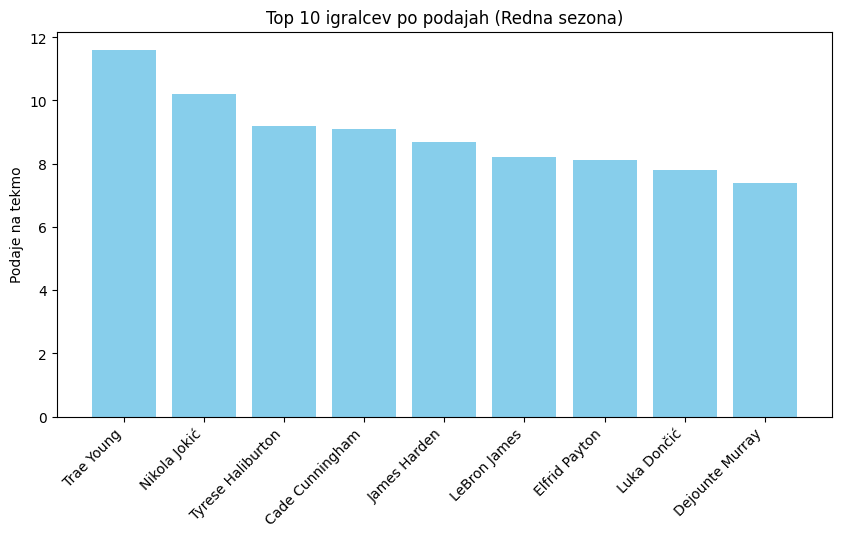

In [44]:
plt.figure(figsize=(10,5))
plt.bar(top10_redna_podaje["ime"], top10_redna_podaje["podaje"], color="skyblue")
plt.title("Top 10 igralcev po podajah (Redna sezona)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Podaje na tekmo")
plt.show()

### 3.2. Končnica

3.2.1. Top 10 igralcev v NBA končnici, raporejenih po povprečnem številu doseženih točk na tekmo.Tukaj se ne upošteva, da eni igralci igrajo manj tekem kot drugi, ker njihova ekipa izpade prej iz "knock-out stage-a":

In [45]:
top10_koncica_tocke = koncnica.sort_values("točke", ascending=False).head(10)
print("Top 10 igralcev po točkah (Končnica):")
print(top10_koncica_tocke[["ime", "ekipa", "točke"]])

Top 10 igralcev po točkah (Končnica):
                       ime ekipa  točke
0    Giannis Antetokounmpo   MIL   33.0
1              Luka Dončić   LAL   30.2
2  Shai Gilgeous-Alexander   OKC   29.9
3         Donovan Mitchell   CLE   29.6
4           Paolo Banchero   ORL   29.4
5            Jalen Brunson   NYK   29.4
6             Jayson Tatum   BOS   28.1
7             Nikola Jokić   DEN   26.2
8             Franz Wagner   ORL   25.8
9             LeBron James   LAL   25.4


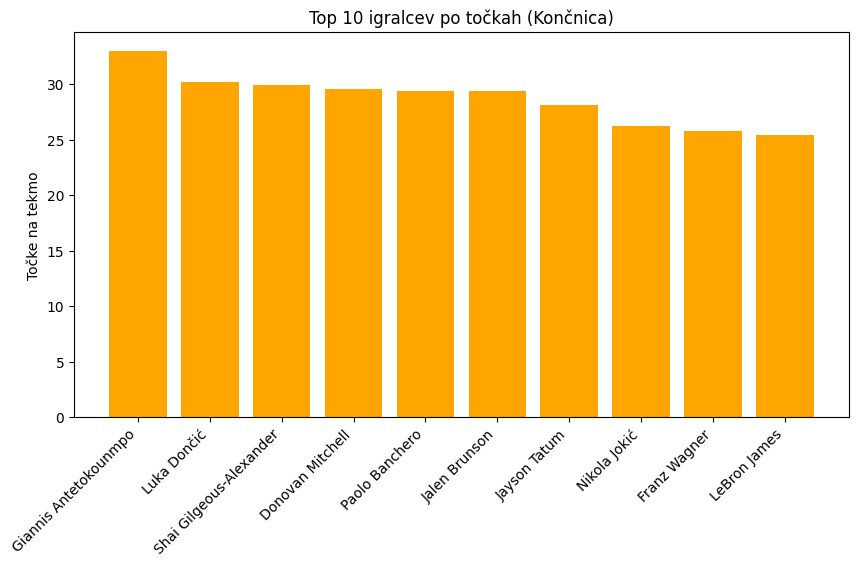

In [46]:
plt.figure(figsize=(10,5))
plt.bar(top10_koncica_tocke["ime"], top10_koncica_tocke["točke"], color="orange")
plt.title("Top 10 igralcev po točkah (Končnica)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Točke na tekmo")
plt.show()

3.2.2. Top 10 igralcev, ki so tekmovali v končnici, razporejenih po skokih:

In [32]:
top10_koncica_skoki = koncnica.sort_values("skoki", ascending=False).head(10)
print("\nTop 10 igralcev po skokih (Končnica):")
print(top10_koncica_skoki[["ime", "ekipa", "skoki"]])


Top 10 igralcev po skokih (Končnica):
                      ime ekipa  skoki
0   Giannis Antetokounmpo   MIL   15.4
7            Nikola Jokić   DEN   12.7
19         Alperen Şengün   HOU   11.9
17     Karl-Anthony Towns   NYK   11.6
6            Jayson Tatum   BOS   11.5
30            Bam Adebayo   MIA   11.0
75     Wendell Carter Jr.   ORL   10.8
62            Jalen Duren   DET   10.7
31            Ivica Zubac   LAC   10.1
9            LeBron James   LAL    9.0


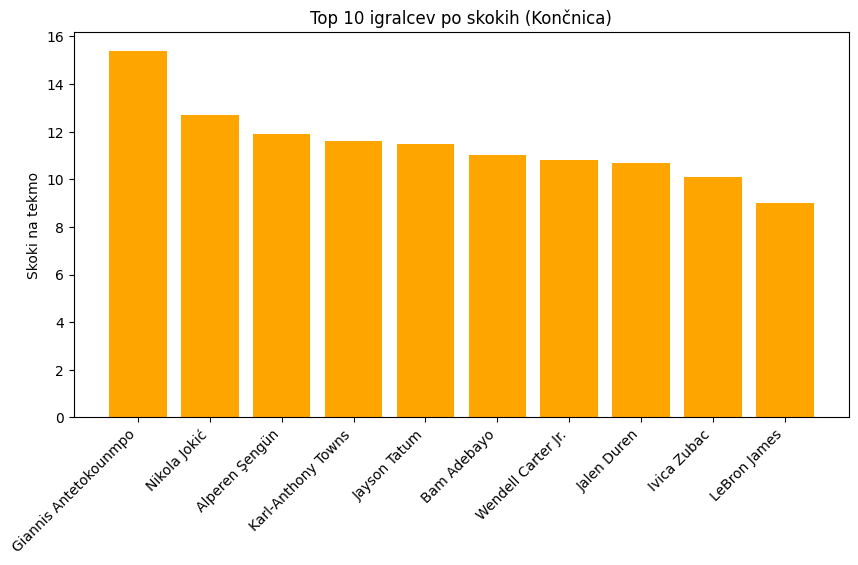

In [33]:
plt.figure(figsize=(10,5))
plt.bar(top10_koncica_skoki["ime"], top10_koncica_skoki["skoki"], color="orange")
plt.title("Top 10 igralcev po skokih (Končnica)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Skoki na tekmo")
plt.show()

3.2.3. Top 10 igralcev po podajah:

In [47]:
top10_koncica_podaje = koncnica.sort_values("podaje", ascending=False).head(10)
print("Top 10 igralcev po podajah (Končnica):")
print(top10_koncica_podaje[["ime", "ekipa", "podaje"]])

Top 10 igralcev po podajah (Končnica):
                        ime ekipa  podaje
24             James Harden   LAC     9.1
11          Cade Cunningham   DET     8.7
32        Tyrese Haliburton   IND     8.6
7              Nikola Jokić   DEN     8.0
5             Jalen Brunson   NYK     7.0
0     Giannis Antetokounmpo   MIL     6.6
2   Shai Gilgeous-Alexander   OKC     6.5
45          Davion Mitchell   MIA     6.3
1               Luka Dončić   LAL     5.8
8              Franz Wagner   ORL     5.6


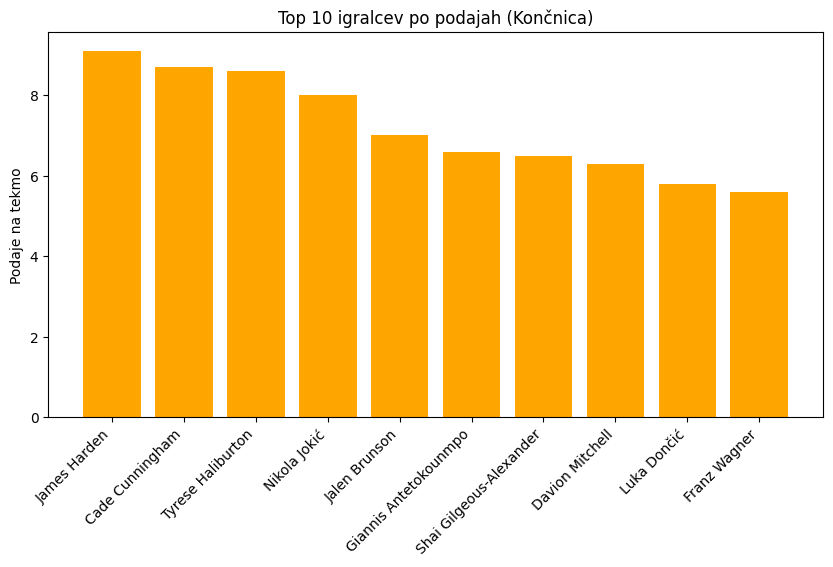

In [48]:
plt.figure(figsize=(10,5))
plt.bar(top10_koncica_podaje["ime"], top10_koncica_podaje["podaje"], color="orange")
plt.title("Top 10 igralcev po podajah (Končnica)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Podaje na tekmo")
plt.show()

### 3.3. Posebni grafi

V tem sklopu sem naredil še par dodatnih primerjav, grafičnih prikazov podatkov, ki so se mi zdeli zanimivi.

Prvo sem naredil tabelo z vsemi igralci, ki so v redni sezoni lige NBA igrali za več ekip (to se zgodi, če igralca na sredi sezone menjajo za drugega, kar se da, dokler je aktiven prestopni rok; tipični primer letos je Luka Dončić, zato se njegovo ime pojavi na prejšnjih tabelah redne sezone kdaj dvakrat, tam moramo biti pozorni na razdelek "Team" in število odigranih iger za ekipo):

In [49]:
podvojeni_igralci = redna.groupby("ime")["ekipa"].nunique()
podvojeni_igralci = podvojeni_igralci[podvojeni_igralci > 1]
print("\nIgralci, ki so igrali za več ekip (Redna sezona):")
print(podvojeni_igralci)


Igralci, ki so igrali za več ekip (Redna sezona):
ime
AJ Johnson           2
Alex Len             2
Alex Reese           2
Andrew Wiggins       2
Anthony Davis        2
                    ..
Tristen Newton       2
Vasilije Micić       2
Wendell Moore Jr.    2
Zach Collins         2
Zach LaVine          2
Name: ekipa, Length: 81, dtype: int64


3.3.1. Povprečje točk po ekipah v redni sezoni. V tem razdelku sem zbral vseh 30 ekip in povprečne vrednosti večjih statistik njihovih igralcev združil v eno tabelo:

In [34]:
povprecja_ekipe_redna = redna.groupby("ekipa")[["točke", "podaje", "skoki"]].mean()
print("\nPovprečje statistike po ekipah (Redna sezona):")
print(povprecja_ekipe_redna)


Povprečje statistike po ekipah (Redna sezona):
           točke    podaje     skoki
ekipa                               
3TM     6.175000  1.975000  2.775000
ATL    10.985714  2.390476  4.004762
BOS     8.666667  1.900000  3.677778
BRK     9.508333  2.475000  3.475000
CHI     8.759091  2.227273  3.381818
CHO     8.892593  2.318519  3.740741
CLE     8.580952  1.914286  3.376190
DAL    10.075000  2.191667  4.195833
DEN     8.994118  2.347059  3.641176
DET     8.519048  2.023810  3.547619
GSW     8.300000  2.221739  3.256522
HOU     8.816667  1.722222  3.944444
IND     7.500000  1.763636  2.895455
LAC     7.769565  1.734783  3.026087
LAL     8.341667  1.970833  3.400000
MEM     8.480952  2.047619  3.380952
MIA     8.947619  2.200000  3.547619
MIL     8.056522  1.960870  3.260870
MIN     6.885000  1.755000  2.800000
NOP    10.108000  2.664000  4.292000
NYK     7.366667  1.747619  3.138095
OKC     8.573684  1.900000  3.494737
ORL     9.152941  2.029412  3.482353
PHI     9.366667  2.140000 

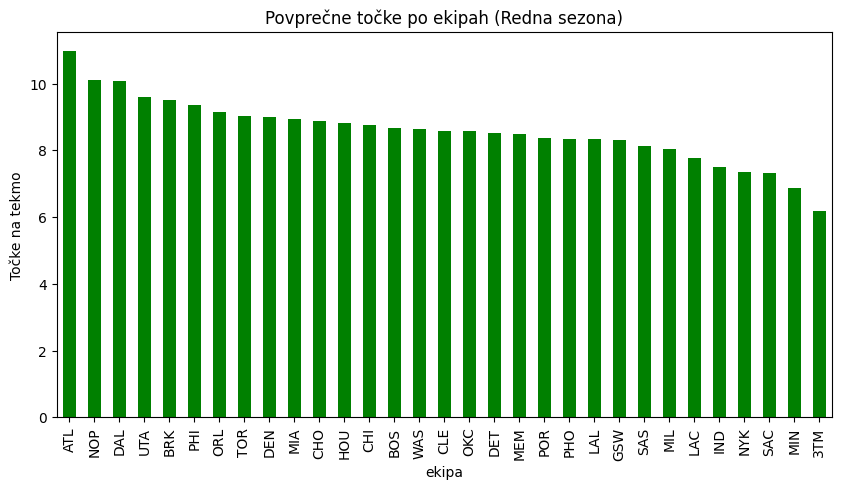

In [35]:
povprecja_ekipe_redna["točke"].sort_values(ascending=False).plot(
    kind="bar", figsize=(10,5), color="green"
)
plt.title("Povprečne točke po ekipah (Redna sezona)")
plt.ylabel("Točke na tekmo")
plt.show()


3.3.2. Primerjava statistike izbranega igralca (Luka Dončić) rednega dela sezone ter končnice. Tukaj se lepo vidi, kako dobri igralci še nadgradijo svojo igro, "ko se gre za res", ko se začne tekmovanje na izpadanje:

In [36]:
izbran = "Luka Dončić"
primerjava = pd.DataFrame({
    "Sezona": ["Redna sezona", "Končnica"],
    "Točke": [
        redna.loc[redna["ime"]==izbran, "točke"].values[0],
        koncnica.loc[koncnica["ime"]==izbran, "točke"].values[0]
    ],
    "Podaje": [
        redna.loc[redna["ime"]==izbran, "podaje"].values[0],
        koncnica.loc[koncnica["ime"]==izbran, "podaje"].values[0]
    ],
    "Skoki": [
        redna.loc[redna["ime"]==izbran, "skoki"].values[0],
        koncnica.loc[koncnica["ime"]==izbran, "skoki"].values[0]
    ]
})

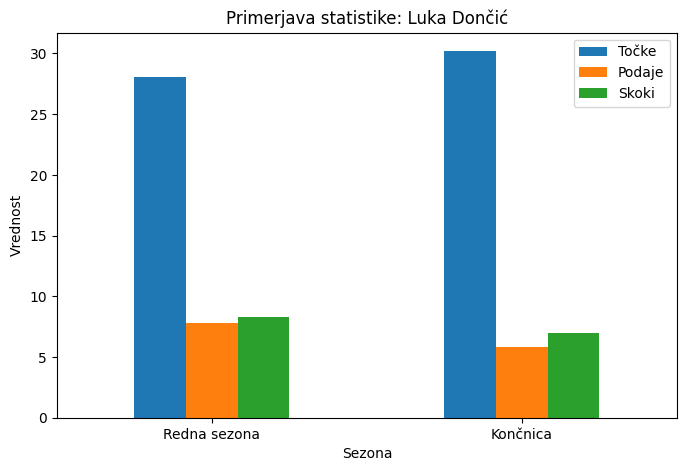

In [37]:
primerjava.set_index("Sezona").plot(kind="bar", figsize=(8,5))
plt.title(f"Primerjava statistike: {izbran}")
plt.ylabel("Vrednost")
plt.xticks(rotation=0)
plt.show()

3.3.3. Povezava med podajami in točkami v redni sezoni. Ta grafični prikaz je dobra slika, da vidimo kakšno povezavo najdemo pri igralcih, ki veliko podajajo in pri teh, ki dajejo veliko košev. Seveda igralci, ki ne igrajo veliko, ne "napolnijo" ne ene, ne druge statistike zelo, kar pojasnjuje ta ekstremno moder del v kotu. Med tem ko eni igralci, kot sta recimo Nikola Jokić in Luka Dončić, prispevata k svoji ekipi veliko število doseženih točk in asistenc (podaj) na tekmo:

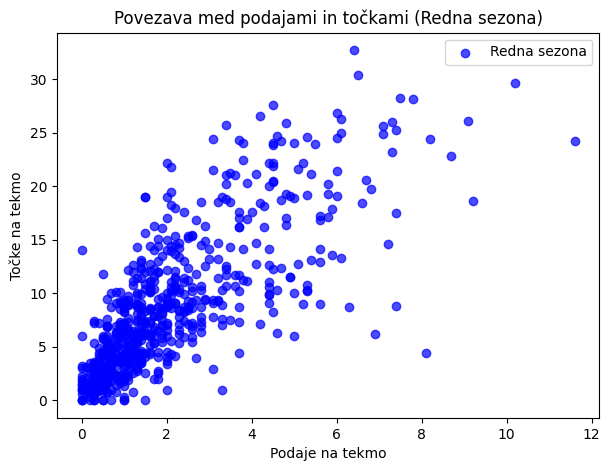

In [38]:
plt.figure(figsize=(7,5))
plt.scatter(redna["podaje"], redna["točke"], alpha=0.7, color="blue", label="Redna sezona")
plt.xlabel("Podaje na tekmo")
plt.ylabel("Točke na tekmo")
plt.title("Povezava med podajami in točkami (Redna sezona)")
plt.legend()
plt.show()